# Pitch Identification

In [395]:
#!pip install ffmpeg

In [396]:
#Imports
import librosa
import librosa.display
import IPython.display as ipd

import pyAudioAnalysis
import pydub
import ffmpeg

from numpy import sin, cos, pi, linspace, arange, log10, absolute
from numpy.random import randn
from scipy.signal import lfilter, lfilter_zi, filtfilt, butter, freqz, welch
from scipy.io.wavfile import read , write
from scipy.signal import spectrogram
from matplotlib import pyplot
from matplotlib.pyplot import ylabel, xlabel
from matplotlib.pyplot import plot, legend, show, grid, figure, savefig#, hold

In [397]:
filename = 'audio/training/J_chave_02.wav'
fs, audio1 = read(filename)
f,t,S1 = spectrogram(audio1, fs, window='flattop', nperseg=fs//10, noverlap=fs//20, scaling='spectrum', mode='magnitude')
print('filename: ', filename)
print('Data Length (s): ',t[-1])
print('Sampling frequency (samples/s): ', fs)

#Playing Audio (Reproduce Audio)
ipd.Audio(filename)

filename:  audio/training/J_chave_02.wav
Data Length (s):  3.65
Sampling frequency (samples/s):  44100


C:\Users\Dasil\AppData\Local\Temp/ipykernel_23056/2518800485.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, audio1 = read(filename)


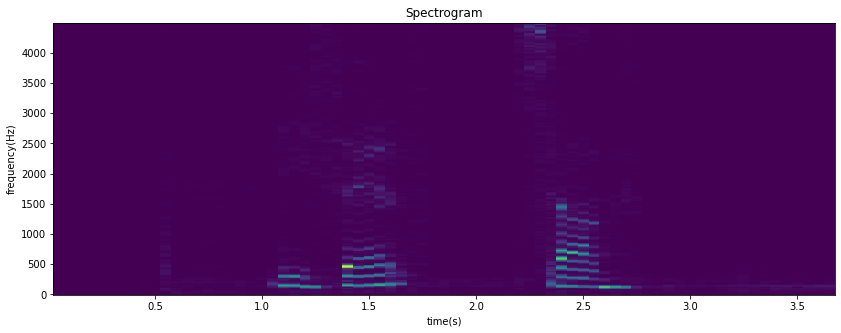

In [398]:
#Spectogram
#Spectrogram 
pyplot.rcParams['figure.figsize'] = 14,5
pyplot.pcolormesh(t, f[:450], S1[:450][:])
pyplot.title("Spectrogram")
xlabel('time(s)')
ylabel('frequency(Hz)')
show()

In [399]:
#Filtro ButterWord

wn = 1500/(fs/2)
b3,a3 = butter(4, wn)
audio1_filt = lfilter(b3,a3,audio1)

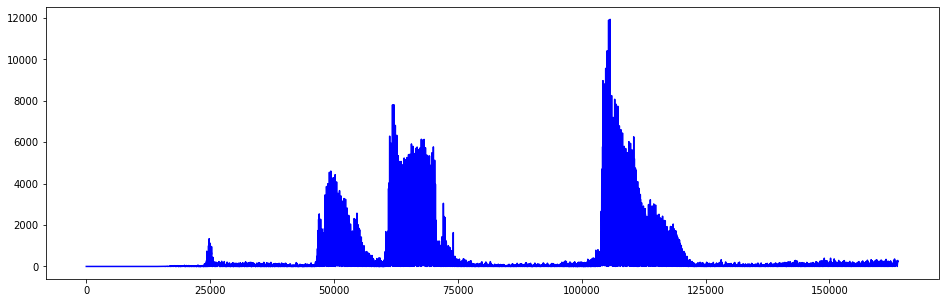

In [400]:
pyplot.rcParams['figure.figsize'] = 16,5
#plot(audio1,'r')
plot(absolute(audio1_filt),'b')

In [401]:
#result = [1 if item > 0.0004*1e8 else 0 for item in audio1_filt**2]
#plot(result)

# Fix-sized segmentation





In the first part we showed how we can segment a long recording to non-overlapping segments using ffmpeg. The following code sample shows how to do the same with Python. Line 8 does the actual segmentation in a single-line command. Overall, the following script loads and normalizes an audio signal, and then it breaks it into 1-second segments and writes each one of them in a file.





(Pay attention to the note in the last comment: you will need to cast to 16bit before saving to file because the numpy conversion has led to higher sample resolutions).

In [402]:

# Fix-sized segmentation (breaks a signal into non-overlapping segments)
    #signal = audio1 / (2**15)
    #signal_len = len(signal)
    #segment_size_t = 1 # segment size in seconds
    #segment_size = segment_size_t * fs  # segment size in samples

# Break signal into list of segments in a single-line Python code
    #segments = np.array([signal[x:x + segment_size] for x in
    #                     np.arange(0, signal_len, segment_size)])

# Save each segment in a seperate filename
    #for iS, s in enumerate(segments):
    #    wavfile.write("data/obama_segment_{0:d}_{1:d}.wav".format(segment_size_t * iS,
    #                                                              segment_size_t * (iS + 1)), fs, (s))

# Audio Division 

In [403]:
from pydub import AudioSegment
from pydub.silence import split_on_silence

song = AudioSegment.from_wav(filename)

db = -30
segments = split_on_silence(song, min_silence_len = 100, silence_thresh = db)
while len(segments) != 2:
    db = db-1
    segments = split_on_silence(song, min_silence_len = 100, silence_thresh = db)

    
n = len(segments)
print("Size of List", n)


# Process each chunk with your parameters
for i, segment in enumerate(segments):

    # Export the audio chunk with new bitrate.
    print("Exporting chunk{0}.wav.".format(i))
    segment.export(
        "audio/data/chunk{0}.wav".format(i),
        bitrate = "192k",
        format = "wav"
    )

Size of List 2
Exporting chunk0.wav.
Exporting chunk1.wav.



# Pitch Detection 

    Using  the cepstrum coeficient. 

In [404]:
import numpy as np
def real_cepstrum(x, n=None):
# Compute the real cepstrum of a real sequence
#    x : ndarray
#        Real sequence to compute real cepstrum of.
#    n : {None, int}, optional
#        Length of the Fourier transform.
#    Returns
#    -------
#    ceps: ndarray
#        The real cepstrum.

    spectrum = np.abs(np.fft.fft(x, n=n))**2
    ceps = np.fft.ifft(np.log(spectrum))

    return ceps, spectrum

In [405]:
import numpy as np
import matplotlib.pyplot as plt

samples = segments[0].get_array_of_samples()
samples = np.array(samples)

#id_filename = 'audio/data/chunk0.wav'
#fs, id_audio = read(id_filename)

ceps, spec = real_cepstrum(samples, n=None)
N = samples.shape[0]

max value index:  [104]


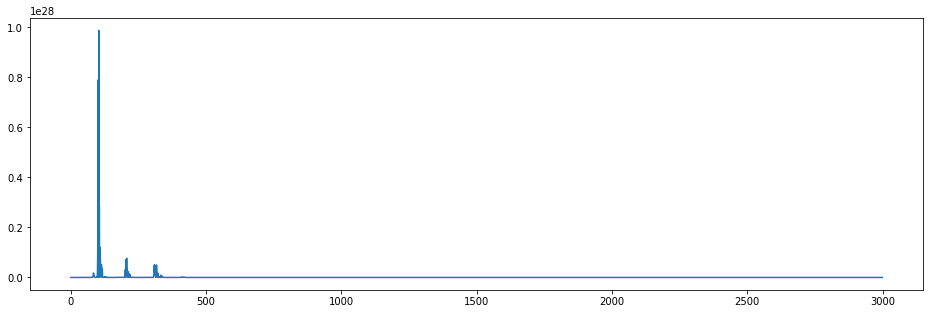

In [406]:
#Power Specturm
power_spec = np.abs(spec[:N//2])**2
plt.plot(power_spec[0:3000])


index = np.where(power_spec == np.max(power_spec))
print('max value index: ', index[0])

433.1360183320967

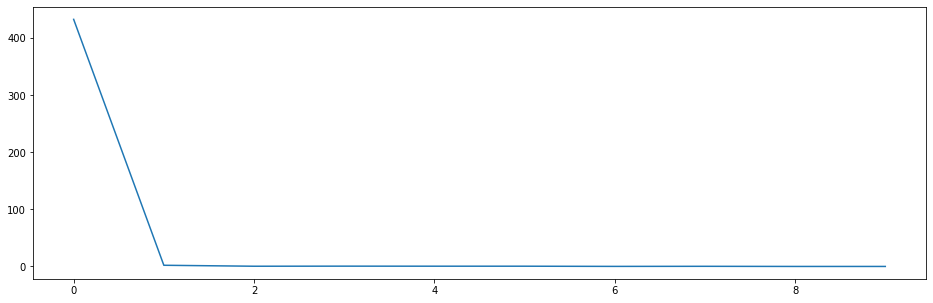

In [407]:
abs_ceps = np.abs(ceps[:N//2])**2
plt.plot(abs_ceps[:10])
np.max(abs_ceps)

In [408]:
print("Power Spectrum: ", index[0], "\n")
print("Power Cepstrum: ", round(np.max(abs_ceps)))

Power Spectrum:  [104] 

Power Cepstrum:  433
